In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

train_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

species = [s.split()[0] for s in le.classes_]

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

In [2]:
X_train

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
1,45.1,14.5,215.0,5000.0,7.63220,-25.46569,1,0,0,1,0,1,1,0
2,41.4,18.5,202.0,3875.0,9.59462,-25.42621,0,0,1,1,0,1,0,1
3,39.0,18.7,185.0,3650.0,9.22033,-26.03442,0,1,0,1,0,1,0,1
4,50.6,19.4,193.0,3800.0,9.28153,-24.97134,0,1,0,1,1,0,0,1
5,33.1,16.1,178.0,2900.0,9.04218,-26.15775,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,41.1,17.5,190.0,3900.0,8.94365,-26.06943,0,1,0,1,0,1,0,1
270,45.4,14.6,211.0,4800.0,8.24515,-25.46782,1,0,0,1,0,1,1,0
271,36.2,17.2,187.0,3150.0,9.04296,-26.19444,0,0,1,1,1,0,1,0
272,50.0,15.9,224.0,5350.0,8.20042,-26.39677,1,0,0,1,0,1,0,1


In [5]:
y_train

array([2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1,
       2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 1, 0, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 0,
       0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2,
       0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2,
       2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1,
       2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2,
       0, 1, 2, 0, 2, 2, 1, 1, 0, 2, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2,
       0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2])

In [3]:
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

cols = ["Culmen Length (mm)", "Culmen Depth (mm)"]

def training_decision_regions(model, cols, **kwargs):
    m = model(**kwargs)
    m.fit(np.array(X_train[cols]), y_train)
    plot_decision_regions(np.array(X_train[cols]), y_train, clf = m)
    ax = plt.gca()
    ax.set(xlabel = cols[0], 
                  ylabel = cols[1], 
                  title = f"Training accuracy = {m.score(np.array(X_train[cols]), y_train).round(2)}")

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, 
              species, 
              framealpha=0.3, 
              scatterpoints=1)

/Users/ndang/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


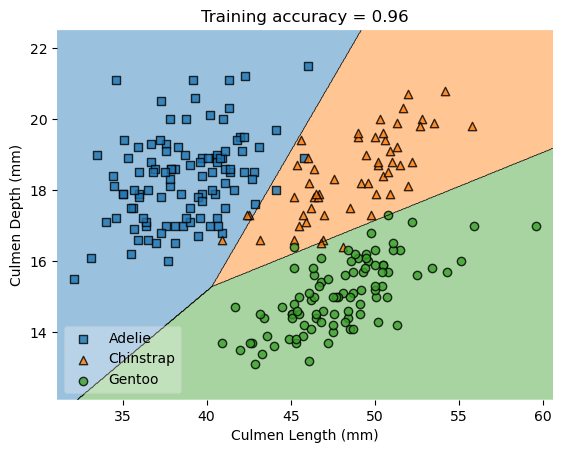

In [4]:
training_decision_regions(LogisticRegression, cols)